# Section 1 : Data exploration, visualization and processing.

In [53]:
#Importing the important libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn import metrics
from sklearn import neighbors 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps
from sklearn.model_selection import train_test_split

In [48]:
# Import the dataset
from google.colab import files
file = files.upload()
df = pd.read_csv("AB_NYC_2019.csv")
df.tail()

Saving AB_NYC_2019.csv to AB_NYC_2019 (1).csv


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [4]:
df.describe() #Using the describe function in order to get a statistical description of numerical predictors and shape of the dataset

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


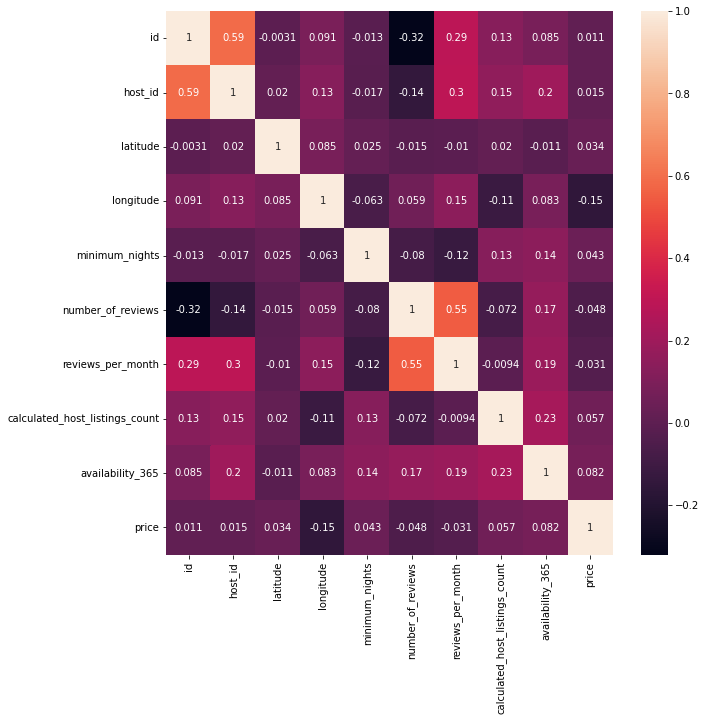

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['id','host_id','latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','price']].corr(), annot=True)

In [6]:
df.info() #Getting a brief summary of the dataset and the type of columns and count of non-null values entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.isnull().sum() #Checking the null values present in the dataset

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#Handling missing values in the dataset
df.drop(['name', 'host_name','last_review'], axis =1, inplace = True) #Dropping the name and host name columns as these are categorical predictors with almost no impact on the price of the listing
df['reviews_per_month'] = df['reviews_per_month'].fillna(0) #Imputing the missing values for reviews per month with 0 as NA values must imply that the listings have never been reviewed

Text(0.5, 1.0, 'Before removing outliers')

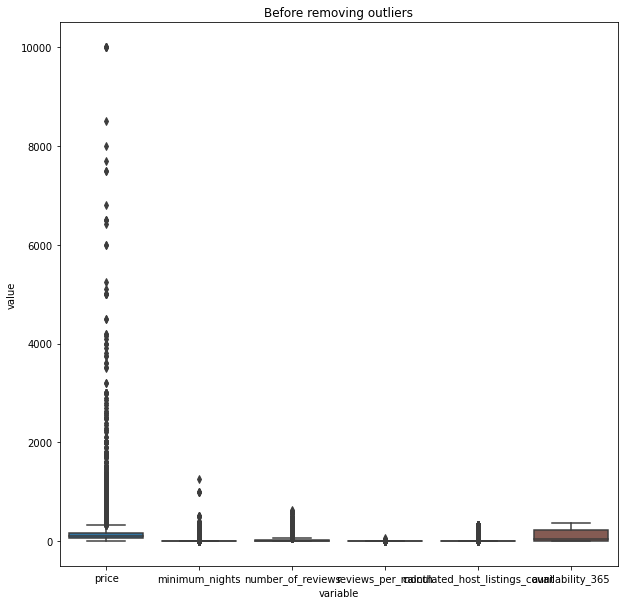

In [9]:
#Checking for the presence of outliers in the numerical predictors present in the dataset
plt.figure(figsize = (10, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])).set_title("Before removing outliers")

In [10]:
#Handling the outliers present in the dataset based on corresponding z-scores
df = df[(np.abs(stats.zscore(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])) < 3).all(axis=1)]

Text(0.5, 1.0, 'After removing outliers')

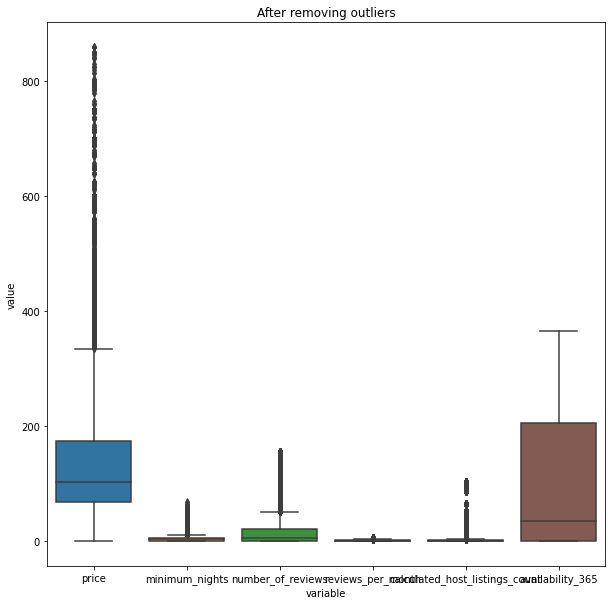

In [11]:
plt.figure(figsize = (10, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])).set_title("After removing outliers")

[Text(0.5, 1.0, 'Airbnb distribution by neighbourhood group')]

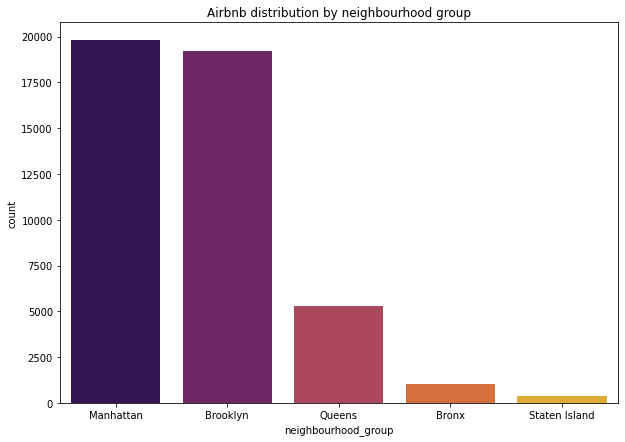

In [12]:
plt.figure(figsize = (10, 7))
sns.countplot(data = df, x="neighbourhood_group",order=df.neighbourhood_group.value_counts().index, palette="inferno").set(title='Airbnb distribution by neighbourhood group')

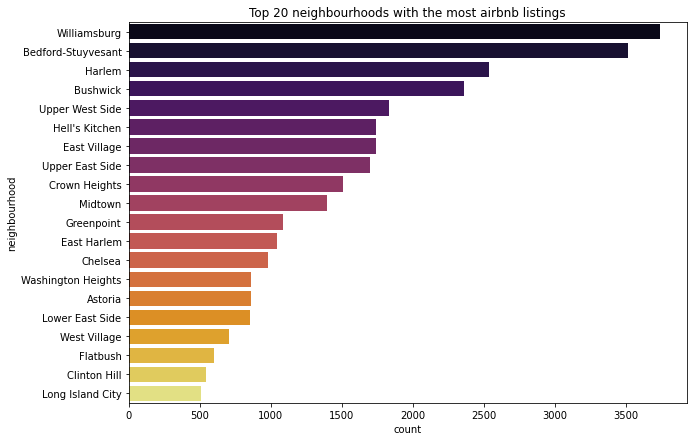

In [13]:
plt.figure(figsize = (10, 7))
plot_2 = sns.countplot(data=df, y="neighbourhood",order=df.neighbourhood.value_counts().iloc[:20].index, palette="inferno").set(title='Top 20 neighbourhoods with the most airbnb listings')

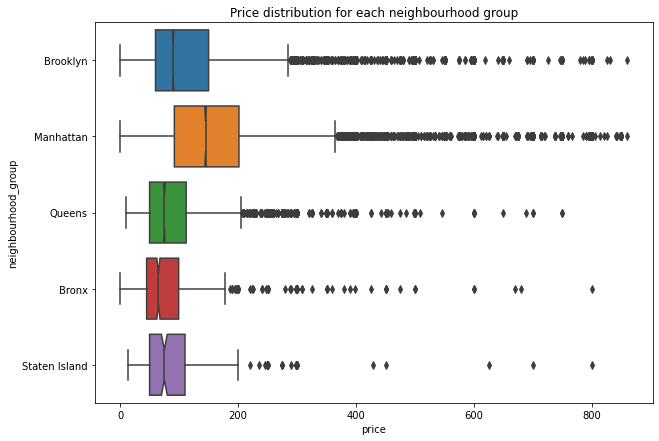

In [14]:
plt.figure(figsize = (10, 7))
plot_3 = sns.boxplot(data=df, y="neighbourhood_group", x="price", notch = True).set_title("Price distribution for each neighbourhood group")

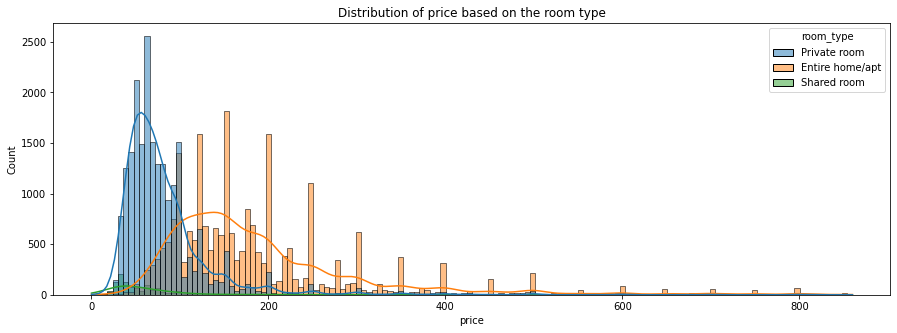

In [15]:
plt.figure(figsize = (15, 5))
plot_4 = sns.histplot(data = df, x='price', kde = True, hue = "room_type").set_title("Distribution of price based on the room type")

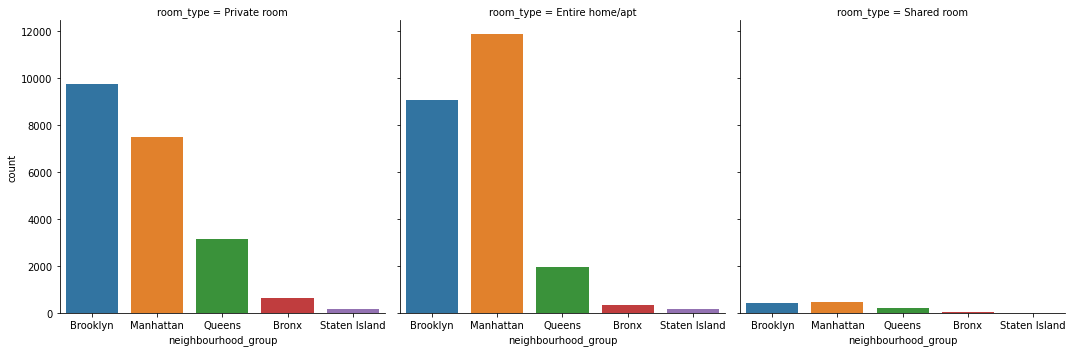

In [16]:
plot_5 = sns.catplot(x='neighbourhood_group', col='room_type', data=df, kind='count')

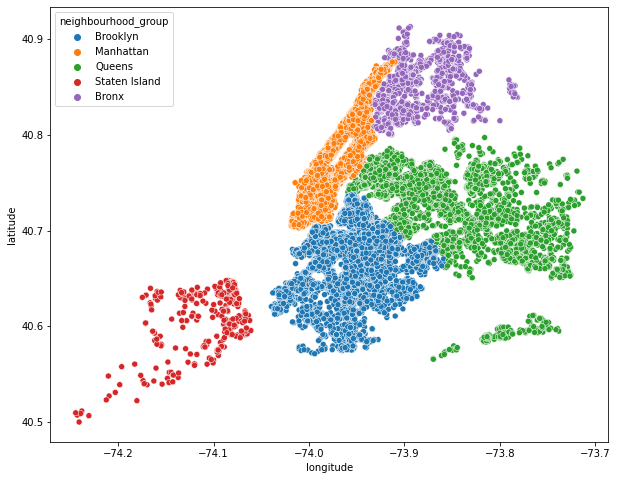

In [50]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data= df, x="longitude",y="latitude",hue="neighbourhood_group")

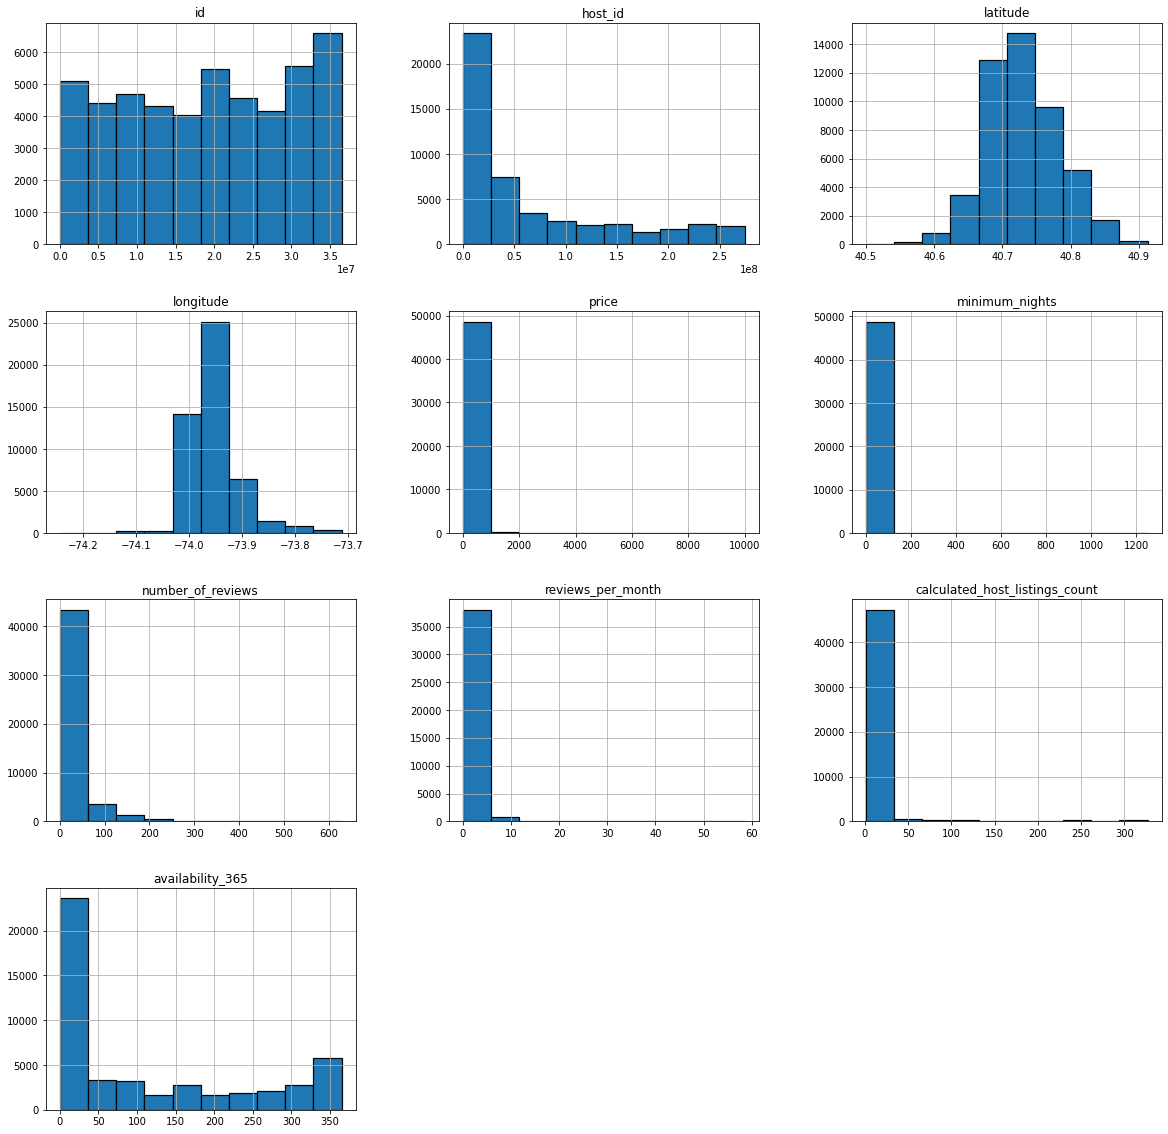

In [52]:
df.hist(edgecolor="black", linewidth=1.2, figsize=(20, 20));

In [17]:
neighbourhood_group_dummies = pd.get_dummies(df['neighbourhood_group'], prefix='Neighbourhood_group') #One hot encoding of the neighbourhood_group column
df['room_type_ordinally_encoded'] = df['room_type'].map({'Entire home/apt':3, 'Private room':2,'Shared room':1}) #ordinal encoding for the room type column with entire home at top followed by private and then shared rooms respectively
neighbourhood_counts = df['neighbourhood'].value_counts()
df['neighbourhood'] = df['neighbourhood'].apply(lambda x: x if str(x) in neighbourhood_counts[:25] else 'Other Neighbourhood') #Balancing the column values
categorical_encoder = LabelEncoder()
df['neighbourhood'] = categorical_encoder.fit_transform(df['neighbourhood'])
df = pd.concat([df, neighbourhood_group_dummies], axis = 1)
df.drop(['neighbourhood_group','room_type'],axis=1, inplace=True)

In [18]:
df.drop(['id','host_id','latitude','longitude'], axis=1, inplace=True) #Dropping the columns id and host_id as it would not be required for the prediction of the prices and neighbourhood as it has 221 unique values and would massively increase the dimension.

# Section 2 : Dimension reduction and variable selection

In [19]:
X = df.drop(['price'],axis = 1)
y = df['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31948, 12)
(13692, 12)
(31948,)
(13692,)


In [21]:
df.head(1)

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_ordinally_encoded,Neighbourhood_group_Bronx,Neighbourhood_group_Brooklyn,Neighbourhood_group_Manhattan,Neighbourhood_group_Queens,Neighbourhood_group_Staten Island
0,18,149,1,9,0.21,6,365,2,0,1,0,0,0


In [22]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train) #scaling the data
X_test = scalar.transform(X_test)

In [61]:
pca = PCA(n_components=12)
airbnb_PCA = pca.fit_transform(X_train)
PC_df = pd.DataFrame(data = airbnb_PCA, columns = ['PC-1', 'PC-2', 'PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12'])
PC_df

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12
0,2.431926,-0.053313,0.989811,0.151700,0.382179,-0.226306,0.581799,1.019939,-0.583373,2.105925,0.384187,4.808398e-14
1,-1.161687,-0.554491,-0.381132,0.253401,0.610560,0.138328,-0.344018,1.770901,0.710485,-0.237868,0.848975,7.316547e-15
2,-0.680915,2.400282,0.749436,1.651028,-1.215746,0.613341,-1.657435,-0.349958,-0.846976,-0.145516,-0.176354,1.619149e-15
3,1.018727,0.277933,0.891258,1.234231,5.169120,-2.293481,-2.315626,-2.719077,1.100991,2.326678,0.029632,1.817340e-15
4,-1.589028,-1.713699,0.077729,-0.088683,-0.321204,-0.409915,1.080024,-0.580849,0.386659,-0.200054,-0.096567,2.008482e-16
...,...,...,...,...,...,...,...,...,...,...,...,...
31943,0.222906,-1.499215,3.482226,-0.384452,0.018799,-0.434200,0.987890,-0.243418,-0.430120,1.276415,0.208922,6.757927e-17
31944,5.331313,0.022883,5.309235,-1.089913,-0.037351,-0.289298,-0.201837,0.110897,3.353509,-3.354984,-0.441837,2.017226e-17
31945,1.211134,-0.625150,-1.157097,-0.595726,-0.530094,-0.093798,0.215843,-1.292674,-0.067667,-0.018611,-0.115846,8.981916e-17
31946,-0.584351,-1.482349,-0.270493,0.502720,0.686223,0.191201,-0.345148,1.711474,0.470225,0.032510,-0.075839,-2.230874e-16


In [71]:
pca.explained_variance_

array([2.02871639e+00, 1.73708694e+00, 1.53287982e+00, 1.26403613e+00,
       1.06944365e+00, 1.01832736e+00, 9.61739654e-01, 8.12223942e-01,
       6.42558569e-01, 5.51905551e-01, 3.81457622e-01, 1.04167636e-31])

# Section 3 : Model Selection and performance evaluation

Model 1 : Linear Regression implementation

In [23]:
#Linear Regression implementation
linear_regression_Model = LinearRegression()
linear_regression_Model.fit(X_train, y_train)
y_hat_1= linear_regression_Model.predict(X_test)
Model_1 = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_hat_1})
Model_1

,Actual Value,Predicted Value
21545,49,113.892926
12073,130,97.814801
40200,20,51.967145
20158,100,77.721051
6977,60,106.135114
...,...,...
4566,100,210.736676
37056,75,119.783551
18984,57,55.236676
6118,125,157.445660


R^2 Value: 0.3180681507449219
Root Mean Squared Error: 86.23053159084115
Mean Absolute Error:: 54.19891053841903


Text(0, 0.5, 'Predicted values')

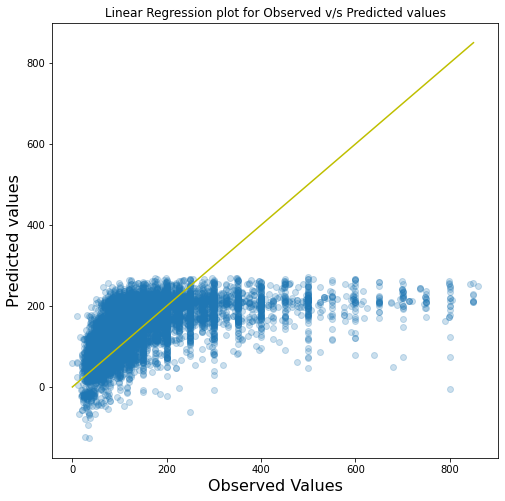

In [24]:
r_squared_1 = linear_regression_Model.score(X_train, y_train)
print('R^2 Value:', r_squared_1)
RMSE_1 = np.sqrt(metrics.mean_squared_error(y_test, y_hat_1))
print('Root Mean Squared Error:', RMSE_1)
MAE_1 = metrics.mean_absolute_error(y_test,  y_hat_1)
print('Mean Absolute Error::', MAE_1)
plt.figure(figsize=(8, 8))
plt.scatter(y=y_hat_1, x=y_test, alpha=0.23)
plt.plot([0, 850], [0,850], 'y-')
plt.title('Linear Regression plot for Observed v/s Predicted values')
plt.xlabel('Observed Values', fontsize=16)
plt.ylabel('Predicted values', fontsize=16)

Model 2 : Random Forest Regression Implementation

In [25]:
random_forest_Model = RandomForestRegressor()
random_forest_Model.fit(X_train, y_train)
y_hat_2 = random_forest_Model.predict(X_test)
Model_2 = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_hat_2})
Model_2

,Actual Value,Predicted Value
21545,49,62.710000
12073,130,66.720000
40200,20,52.840000
20158,100,58.940000
6977,60,66.070000
...,...,...
4566,100,335.152286
37056,75,52.390000
18984,57,48.610000
6118,125,184.250000


R^2 Value: 0.8569174901132772
Root Mean Squared Error: 81.44084768574662
Mean Absolute Error:: 49.64661643143378


Text(0, 0.5, 'Predicted values')

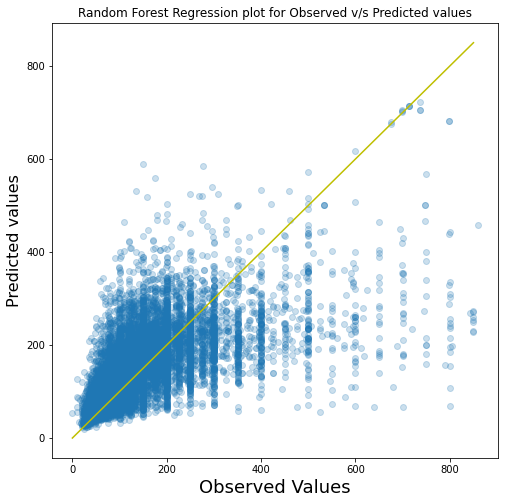

In [26]:
r_squared_2 = random_forest_Model.score(X_train, y_train)
print('R^2 Value:', r_squared_2)
RMSE_2 = np.sqrt(metrics.mean_squared_error(y_test, y_hat_2))
print('Root Mean Squared Error:', RMSE_2)
MAE_2 = metrics.mean_absolute_error(y_test,  y_hat_2)
print('Mean Absolute Error::', MAE_2)
plt.figure(figsize=(8, 8))
plt.scatter(y=y_hat_2, x=y_test, alpha=0.23)
plt.plot([0, 850], [0,850], 'y-')
plt.title('Random Forest Regression plot for Observed v/s Predicted values')
plt.xlabel('Observed Values', fontsize=18)
plt.ylabel('Predicted values', fontsize=16)

Model 3 : XGBoost Regression Implementation

In [27]:
XGBoost_model = XGBRegressor()
XGBoost_model.fit(X_train, y_train)
y_hat_3 = XGBoost_model.predict(X_test)
Model_3 = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_hat_3})
Model_3

[03:32:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Actual Value,Predicted Value
21545,49,76.291435
12073,130,74.351784
40200,20,52.289177
20158,100,72.505684
6977,60,60.846893
...,...,...
4566,100,199.658813
37056,75,73.480370
18984,57,31.728029
6118,125,152.964417


R^2 Value: 0.4210331132608206
Root Mean Squared Error: 79.98129582782111
Mean Absolute Error:: 48.38939037428869


Text(0, 0.5, 'Predicted values')

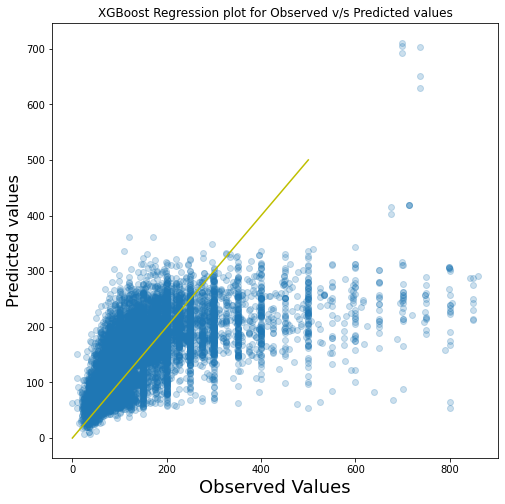

In [28]:
r_squared_3 = XGBoost_model.score(X_train, y_train)
print('R^2 Value:', r_squared_3)
RMSE_3 = np.sqrt(metrics.mean_squared_error(y_test, y_hat_3))
print('Root Mean Squared Error:', RMSE_3)
MAE_3 = metrics.mean_absolute_error(y_test,  y_hat_3)
print('Mean Absolute Error::', MAE_3)
plt.figure(figsize=(8, 8))
plt.scatter(y=y_hat_3, x=y_test, alpha=0.23)
plt.plot([0, 500], [0,500], 'y-')
plt.title('XGBoost Regression plot for Observed v/s Predicted values')
plt.xlabel('Observed Values', fontsize=18)
plt.ylabel('Predicted values', fontsize=16)

Model 4 : K-Nearest Neighbours Implementation

In [29]:
mse_value = []
for i in range(1,10):
  knn= neighbors.KNeighborsRegressor(n_neighbors = i)
  knn.fit(X_train,y_train)
  prediction=knn.predict(X_test)
  mse=metrics.mean_squared_error(y_test,prediction)
  mse_value.append(mse)
  print('For k value:',i,'MSE value is:',mse)

For k value: 1 MSE value is: 11425.471516213847
For k value: 2 MSE value is: 8930.415023371312
For k value: 3 MSE value is: 7920.174668094914
For k value: 4 MSE value is: 7438.094316023956
For k value: 5 MSE value is: 7139.535422144318
For k value: 6 MSE value is: 7017.362101145844
For k value: 7 MSE value is: 6929.842741478712
For k value: 8 MSE value is: 6847.556142501096
For k value: 9 MSE value is: 6792.1149224743285


In [30]:
KNN_model = neighbors.KNeighborsRegressor(n_neighbors=15)
KNN_model.fit(X_train, y_train)
y_hat_4 = KNN_model.predict(X_test)
Model_4=pd.DataFrame({'Actual':y_test, "Predicted":y_hat_4})
Model_4

,Actual,Predicted
21545,49,64.733333
12073,130,67.133333
40200,20,51.133333
20158,100,67.266667
6977,60,65.333333
...,...,...
4566,100,205.400000
37056,75,81.200000
18984,57,47.533333
6118,125,127.333333


R^2 Value: 0.4658823719756503
Root Mean Squared Error: 81.66349289016983
Mean Absolute Error:: 49.65670951407148


Text(0, 0.5, 'Predicted values')

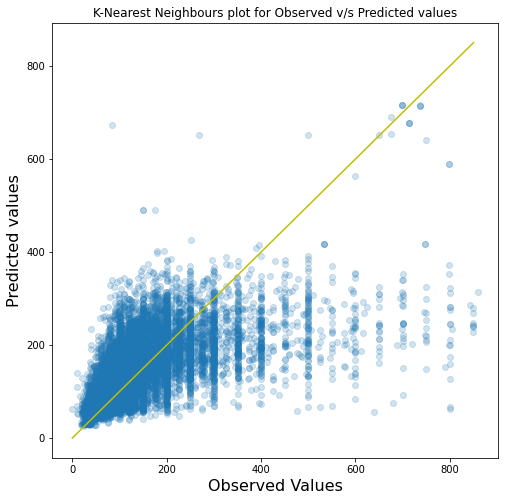

In [31]:
r_squared_4 = KNN_model.score(X_train, y_train)
print('R^2 Value:', r_squared_4)
RMSE_4 = np.sqrt(metrics.mean_squared_error(y_test, y_hat_4))
print('Root Mean Squared Error:', RMSE_4)
MAE_4 = metrics.mean_absolute_error(y_test,  y_hat_4)
print('Mean Absolute Error::', MAE_4)
plt.figure(figsize=(8, 8))
plt.scatter(y=y_hat_4, x=y_test, alpha=0.2)
plt.plot([0, 850], [0,850], 'y-')
plt.title('K-Nearest Neighbours plot for Observed v/s Predicted values')
plt.xlabel('Observed Values', fontsize=16)
plt.ylabel('Predicted values', fontsize=16)

Model 5 : Gradient Boosting regression Implementation

In [32]:
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_hat_5 = GB_model.predict(X_test)
Model_5 = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_hat_5})
Model_5

,Actual Value,Predicted Value
21545,49,74.517450
12073,130,74.206156
40200,20,51.627588
20158,100,73.562659
6977,60,60.643709
...,...,...
4566,100,199.662382
37056,75,74.579110
18984,57,33.751125
6118,125,152.887036


R^2 Value: 0.42124191602422
Root Mean Squared Error: 79.98113191690065
Mean Absolute Error:: 48.39855142834761


Text(0, 0.5, 'Predicted values')

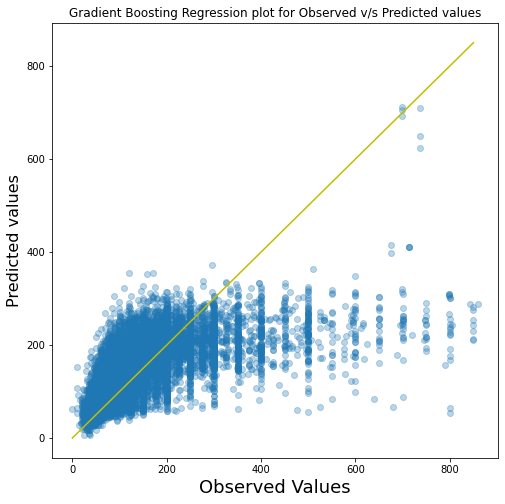

In [33]:
r_squared_5 = GB_model.score(X_train, y_train)
print('R^2 Value:', r_squared_5)
RMSE_5 = np.sqrt(metrics.mean_squared_error(y_test, y_hat_5))
print('Root Mean Squared Error:', RMSE_5)
MAE_5 = metrics.mean_absolute_error(y_test,  y_hat_5)
print('Mean Absolute Error::', MAE_5)
plt.figure(figsize=(8, 8))
plt.scatter(y=y_hat_5, x=y_test, alpha=0.3)
plt.plot([0, 850], [0,850], 'y-')
plt.title('Gradient Boosting Regression plot for Observed v/s Predicted values')
plt.xlabel('Observed Values', fontsize=18)
plt.ylabel('Predicted values', fontsize=16)

In [34]:
Model_comparison = [["Linear Regression",RMSE_1, MAE_1, r_squared_1],["Random Forest Regression", RMSE_2, MAE_2, r_squared_2],["XGBoost Regression",RMSE_3, MAE_3, r_squared_3],["K-Nearest Neighbours",RMSE_4, MAE_4, r_squared_4],["Gradient Boosting Regression",RMSE_5, MAE_5, r_squared_5]]
Model_comparison = pd.DataFrame(data=Model_comparison, columns=["Model","RMSE", "MAE", "R^2"])
Model_comparison

,Model,RMSE,MAE,R^2
0,Linear Regression,86.230532,54.198911,0.318068
1,Random Forest Regression,81.440848,49.646616,0.856917
2,XGBoost Regression,79.981296,48.389390,0.421033
3,K-Nearest Neighbours,81.663493,49.656710,0.465882
4,Gradient Boosting Regression,79.981132,48.398551,0.421242


<Figure size 720x720 with 0 Axes>

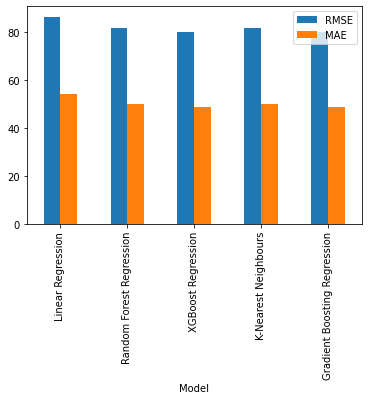

In [45]:
plt.figure(figsize=(10,10))
Model_comparison.plot(x="Model", y=["RMSE", "MAE"], kind="bar")